### importing libraries

In [1]:
import os
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string

### image preprocessing

In [2]:
def preprocess_image(image_path, target_height=52, target_width=128):
    image = Image.open(image_path)
    image = image.convert("L")
    image = image.resize((target_width, target_height),resample=Image.BICUBIC)
    image_array = np.array(image) / 255.0    
    return image_array

In [3]:
path = "D:/textDetection_and_textRecognition/Renamed_Images_train"
list_of_images = [os.path.join(path, filename) for filename in os.listdir(path) if filename.endswith(('.jpg', '.jpeg', '.png'))]
preprocessed_images = []
for image_path in list_of_images:
    preprocessed_image = preprocess_image(image_path)
    preprocessed_images.append(preprocessed_image)
preprocessed_images_array = np.array(preprocessed_images)
print("Shape of preprocessed images array:", preprocessed_images_array.shape)

Shape of preprocessed images array: (4000, 52, 128)


In [4]:
path="D:/textDetection_and_textRecognition/Renamed_Images_test"
list_of_images1 = [os.path.join(path, filename) for filename in os.listdir(path) if filename.endswith(('.jpg', '.jpeg', '.png'))]
preprocessed_images1 = []
for image_path in list_of_images1:
    preprocessed_image1 = preprocess_image(image_path)
    preprocessed_images1.append(preprocessed_image1)
preprocessed_images_array1 = np.array(preprocessed_images1)
print("Shape of preprocessed images array:", preprocessed_images_array1.shape)

Shape of preprocessed images array: (1000, 52, 128)


### text preprocessing 

In [5]:
text_list=[]
with open("train_5k_text.txt", 'r') as file:
    for line in file:
        text_list.append(line.strip())

In [6]:
text_list1=[]
with open("test_5k_text.txt", 'r') as file:
    for line in file:
        text_list1.append(line.strip())

In [7]:
len(text_list)

4000

In [8]:
normalized_word_list = text_list

# Tokenize words into characters
def tokenize_word(word):
    return [char for char in word]

tokenized_word_list = [tokenize_word(word) for word in normalized_word_list]

# Define vocabulary
char_list = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ' # 95 chars
vocabulary = sorted(set(char_list))

# Create char-to-index and index-to-char dictionaries
char_to_index = {char: i for i, char in enumerate(vocabulary)}
index_to_char = {i: char for char, i in char_to_index.items()}

# Encode tokenized sequences into numerical representations
encoded_word_list = [[char_to_index[char] for char in word] for word in tokenized_word_list]

# Pad sequences to a fixed length
max_seq_length = 32  # Adjust as needed
padded_word_list = pad_sequences(encoded_word_list, maxlen=max_seq_length, padding='post')

# Convert padded sequences into one-hot encoded format
num_classes = len(vocabulary)
one_hot_encoded_list = [np.eye(num_classes)[word] for word in padded_word_list]

# Convert to numpy array and reshape to match model input shape
one_hot_encoded_array = np.array(one_hot_encoded_list)
one_hot_encoded_array = one_hot_encoded_array.reshape(-1, max_seq_length, num_classes)

print("Padded word list shape:", padded_word_list.shape)
print("One-hot encoded array shape:", one_hot_encoded_array.shape)


Padded word list shape: (4000, 32)
One-hot encoded array shape: (4000, 32, 95)


In [9]:
# Assuming you have another word list called text_list1

# Normalize words in the second word list
normalized_word_list1 = text_list1

# Tokenize words into characters
def tokenize_word(word):
    return [char for char in word]

# Tokenize words in the second word list into characters
tokenized_word_list1 = [tokenize_word(word) for word in normalized_word_list1]

# Define vocabulary
char_list1 = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ' # 95 chars
vocabulary1 = sorted(set(char_list1))

# Create char-to-index and index-to-char dictionaries
char_to_index1 = {char: i for i, char in enumerate(vocabulary1)}
index_to_char1 = {i: char for char, i in char_to_index1.items()}

# Encode tokenized sequences into numerical representations
encoded_word_list1 = [[char_to_index1[char] for char in word] for word in tokenized_word_list1]

# Pad sequences to a fixed length
max_seq_length1 = 32  # Adjust as needed
padded_word_list1 = pad_sequences(encoded_word_list1, maxlen=max_seq_length1, padding='post')

# Convert padded sequences into one-hot encoded format
num_classes1 = len(vocabulary1)
one_hot_encoded_list1 = [np.eye(num_classes1)[word] for word in padded_word_list1]

# Convert to numpy array and reshape to match model input shape
one_hot_encoded_array1 = np.array(one_hot_encoded_list1)
one_hot_encoded_array1 = one_hot_encoded_array1.reshape(-1, max_seq_length1, num_classes1)

print("Padded word list shape for the second word list:", padded_word_list1.shape)
print("One-hot encoded array shape for the second word list:", one_hot_encoded_array1.shape)


Padded word list shape for the second word list: (1000, 32)
One-hot encoded array shape for the second word list: (1000, 32, 95)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_images_array, one_hot_encoded_array, test_size=0.2, random_state=42)

In [11]:
X_test.shape

(800, 52, 128)

## model architecture

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(104, (3, 3), activation='relu', padding='same', input_shape=(52, 128, 1), kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.SeparableConv2D(208, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.SeparableConv2D(416, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D((4, 1)))
model.add(layers.BatchNormalization())

model.add(layers.SeparableConv2D(416, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D((2, 1)))
model.add(layers.BatchNormalization()) 

model.add(layers.Lambda(lambda x: tf.squeeze(x, axis=1)))

model.add(layers.Bidirectional(layers.GRU(128, return_sequences=True, kernel_initializer='he_normal'), merge_mode='sum'))
model.add(layers.Bidirectional(layers.GRU(128, return_sequences=True, kernel_initializer='he_normal'), merge_mode='sum'))
model.add(layers.TimeDistributed(layers.Dense(95, activation='softmax')))
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 52, 128, 104)      1040      
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 64, 104)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 26, 64, 104)       416       
 Normalization)                                                  
                                                                 
 separable_conv2d (Separabl  (None, 26, 64, 208)       22776     
 eConv2D)                                                        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 32, 208)       0         
 g2D)                                                 

In [15]:
model.outputs

[<KerasTensor: shape=(None, 32, 95) dtype=float32 (created by layer 'time_distributed')>]

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history1 = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,validation_data=(X_test,y_test))



Epoch 1/20


100/100 [==============================] - 39s 294ms/step - loss: 0.9167 - accuracy: 0.8258 - val_loss: 0.8469 - val_accuracy: 0.8423
Epoch 2/20
100/100 [==============================] - 30s 297ms/step - loss: 0.7007 - accuracy: 0.8488 - val_loss: 0.8554 - val_accuracy: 0.8423
Epoch 3/20
100/100 [==============================] - 29s 288ms/step - loss: 0.6841 - accuracy: 0.8495 - val_loss: 0.8315 - val_accuracy: 0.8423
Epoch 4/20
100/100 [==============================] - 29s 290ms/step - loss: 0.6689 - accuracy: 0.8504 - val_loss: 0.8157 - val_accuracy: 0.8423
Epoch 5/20
100/100 [==============================] - 29s 291ms/step - loss: 0.6544 - accuracy: 0.8509 - val_loss: 0.7629 - val_accuracy: 0.8423
Epoch 6/20
100/100 [==============================] - 31s 313ms/step - loss: 0.6367 - accuracy: 0.8529 - val_loss: 0.7230 - val_accuracy: 0.8464
Epoch 7/20
100/100 [==============================] - 30s 301ms/step - loss: 0.6132 - accuracy: 0.8551 - val_loss: 0.7635 - val

In [12]:
import pickle
file_path = "new_final_textrecognition_model.pkl"
with open(file_path, 'rb') as f:
    model = pickle.load(f)

## predictions

In [13]:
y_pred=model.predict(X_test)

25/25 [==============================] - 8s 152ms/step


In [14]:
test_pred=model.predict(preprocessed_images_array1)

32/32 [==============================] - 9s 151ms/step


In [15]:
test_pred.shape

(1000, 32, 95)

In [16]:
y_pred.shape

(800, 32, 95)

In [17]:
y_pred

array([[[1.08627399e-04, 8.17634771e-07, 2.20378161e-06, ...,
         8.55454857e-07, 1.70347334e-06, 4.02844279e-07],
        [2.89981836e-03, 3.35495713e-07, 1.06610150e-06, ...,
         4.07384817e-07, 7.14295652e-07, 4.63485435e-07],
        [4.72211279e-04, 2.26095516e-08, 3.39630404e-08, ...,
         1.53513522e-08, 2.00247001e-07, 3.76465437e-08],
        ...,
        [9.99955773e-01, 2.17853557e-09, 7.52754392e-09, ...,
         4.70403583e-09, 3.80087961e-09, 7.78761278e-10],
        [9.99257028e-01, 1.53605999e-08, 2.45701486e-08, ...,
         1.27746684e-08, 4.47725697e-08, 2.47173162e-08],
        [9.99550998e-01, 3.08561745e-08, 2.78223133e-08, ...,
         1.83993905e-08, 2.01218072e-07, 3.65248276e-08]],

       [[2.25183539e-05, 4.96303301e-06, 3.11036274e-06, ...,
         1.34940524e-06, 2.65069684e-06, 1.60063496e-06],
        [6.22064807e-04, 3.78502307e-07, 7.81963536e-07, ...,
         2.15013543e-07, 5.90882905e-07, 1.08578251e-06],
        [8.33554100e-03, 

### accuracies

In [18]:
predicted_labels_flat = np.argmax(y_pred, axis=-1)
y_test_flat = np.argmax(y_test, axis=-1)
correct_predictions = np.sum(np.equal(predicted_labels_flat, y_test_flat))
total_predictions = np.prod(predicted_labels_flat.shape)
accuracy = correct_predictions / total_predictions * 100

print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 82.64%


In [19]:
predicted_labels_flat = np.argmax(test_pred, axis=-1)
y_test_flat = np.argmax(one_hot_encoded_array1, axis=-1)
correct_predictions = np.sum(np.equal(predicted_labels_flat, y_test_flat))
total_predictions = np.prod(predicted_labels_flat.shape)
accuracy = correct_predictions / total_predictions * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 83.14%


In [20]:
y_pred.shape

(800, 32, 95)

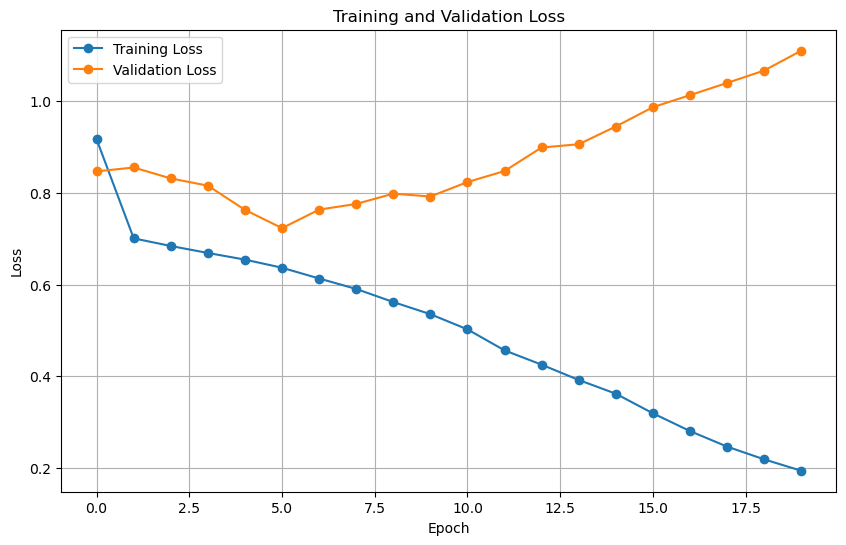

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(history1.history['loss'], label='Training Loss', marker='o')
plt.plot(history1.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### ctc decoder for text predictions from the probabilities

In [22]:
char_list = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ' # 95 chars
vocabulary = sorted(set(char_list))

In [23]:
len(vocabulary)

95

In [24]:
char_to_index = {char: i for i, char in enumerate(vocabulary)}
index_to_char = {i: char for char, i in char_to_index.items()}

In [25]:
def unpad_sequence(seq):
    return [index for index in seq if index != 0]

In [32]:
def ctc_decoder(actual,pred):
    pred_list = np.argmax(pred, axis=-1)
    actual_list = np.argmax(actual, axis=-1)
    decoded_pred_list = [[index_to_char[index] for index in unpad_sequence(seq)] for seq in pred_list]
    decoded_pred_list = [''.join(word) for word in decoded_pred_list]
    decoded_actual_list = [[index_to_char[index] for index in unpad_sequence(seq)] for seq in actual_list]
    decoded_actual_list = [''.join(word) for word in decoded_actual_list]
    return decoded_actual_list,decoded_pred_list

In [33]:
act,pred=ctc_decoder(one_hot_encoded_array1,test_pred)

In [34]:
act

['STREET',
 'LIGHT',
 'SOLUTIONS',
 'DAYS',
 'FREE',
 '93',
 'NEWS',
 'MADE',
 'EXCITING',
 'NEWS',
 'AP',
 'QUAINTES',
 'HOUSE',
 'I',
 'DID',
 'NOW',
 'I',
 'DO',
 'CEYLINCO',
 'DAY',
 'DREAMER',
 'LOWER',
 'COOMBE',
 'DIN',
 'JEETO',
 'VILLA',
 'ROSLYN',
 'AVE',
 'TAKOMA',
 '154',
 '56',
 '3',
 '172',
 '64',
 '39',
 '136',
 'THE',
 'CLONES',
 '15',
 '8',
 '45',
 'ABBEY',
 'HILLCREST',
 '63',
 '15',
 '8',
 'HYGIENE',
 'FOOD',
 '13',
 'CORRIE',
 'HOLDINGS',
 'THE',
 'MALT',
 'HOUSE',
 '2571',
 'SOUTH',
 'PINE',
 'YOUR',
 'NAMR',
 'HERE',
 'OAK',
 'TREE',
 'VILLAS',
 '27',
 '222',
 'OAK',
 'TREE',
 'VILLAS',
 'SCHO',
 'FIELD',
 'ROAD',
 'NIKKI',
 'BRADY',
 'KARI',
 'VIEW',
 '5',
 'WELCOME',
 '33',
 '21',
 'NUMBER',
 'SURREY',
 'MEWS',
 'CLICK',
 '17',
 'PENROSE',
 'COURT',
 'DEALING',
 'DRUGS',
 'DONT',
 'WELL',
 'OURSELVES',
 'IN',
 '2419',
 'BELLWAY',
 'STYLISH',
 'NEW',
 'MAKING',
 'IT',
 'BETTER',
 'IVY',
 'COTTAGE',
 '10',
 'PEACE',
 'HAVEN',
 'CHILD',
 'FIRST',
 'AND',
 'SPACE',


In [35]:
pred

['Poues',
 'GRRGEL',
 'PFL',
 'OOOBILDO',
 'SOSST',
 'MF',
 '1N',
 'SASA6',
 'Bo',
 'EEE',
 'CODI',
 'CHTR',
 'Rot',
 'WWRISSS',
 'OOUR',
 'BFIRDodA',
 'SARISS',
 'MiR',
 'OF',
 'SaTe',
 'NTcAa',
 'BOUSEE',
 'FFlAAN',
 'TET',
 'AAEEI',
 'SR',
 'THeD',
 'OOe',
 'MER',
 'PorT',
 'OOO',
 'IAAT',
 'AANL',
 'SRU',
 'BAITI',
 'CNMI',
 'CANA',
 'OIMI',
 'AT',
 'IOTTE',
 'FOAKNNN',
 'COe',
 'IGAGE',
 'HULCe',
 'BHSNN',
 'SN',
 'Bour',
 'AE',
 'WOR',
 'SRNTEN',
 'GATE',
 'PEREEEER',
 'AUNS',
 'A00TT',
 'BEe',
 'IOO',
 'oor',
 'IIGI',
 'Cn',
 'MERE',
 'Wivvvss',
 'AAA',
 'AAA',
 'FFDI',
 'AANLL',
 'Soradd',
 'ANY',
 'HO',
 'K0K',
 'IIs',
 'Iuaa',
 'SX',
 'BLLCY',
 'OO',
 'OOCY',
 'OE',
 '6nn',
 'OOGGT',
 'see',
 'BHANNNE',
 'OOON',
 'NHRAN',
 'Ohhsa',
 'sE',
 'WODAC',
 'ARMILLN',
 'SEEE',
 'OA',
 'BAWARK',
 'AN',
 'SAAN',
 'AEEI',
 'CoE',
 'HAAN',
 'FRNTA',
 'SRNRR',
 'MRRLR',
 'CASCC',
 'HRRCL',
 'HNmKi',
 'HON',
 'FFF',
 'OOOS',
 'SOIRTT',
 'SRLKIAR',
 'Rit',
 'CRRCI',
 'Ciai',
 'CLLNI',
 'CAH